In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.table import Table



save = False

sns.set(style="whitegrid")

In [2]:
# SELECTING THE FEATURES FOR CALCULATING THE ORBITS OF BANARY STARS FROM GAIA DR3
features = [
    "source_id",
    "ra",
    "dec",
    "ra_error",
    "dec_error",
    "ra_dec_corr",
    "parallax",
    "parallax_error",
    "pmra",
    "pmra_error",
    "pmdec",
    "pmdec_error",
    "phot_g_mean_mag",
    "phot_bp_mean_mag",
    "phot_rp_mean_mag",
    "bp_rp",
    "radial_velocity",
    "radial_velocity_error",
]

## Detecting Wide Binaries

In [3]:
raw_df = pd.read_csv("DATA/Pleiades_Chulkov_filtered_Gaia_DR3.csv")
print(f"Number of stars in the Pleiades: {len(raw_df)}")

# SELECTING THE FEATURES FOR CALCULATING THE ORBITS OF BANARY STARS FROM GAIA DR3
df = raw_df[features]
df.head()

Number of stars in the Pleiades: 423


,source_id,ra,dec,ra_error,dec_error,ra_dec_corr,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error
0,65588484235454592,58.268967,22.801153,0.013425,0.008666,-0.124594,7.293433,0.014909,19.036700,0.017368,-45.560948,0.011600,13.100869,13.850247,12.250756,1.599491,6.250218,0.944959
1,65641913628380288,58.488726,23.345105,0.021880,0.012707,0.022201,7.415903,0.022449,20.241861,0.033256,-44.270417,0.017818,13.549343,14.446805,12.603915,1.842890,19.819576,3.596542
2,65660158649542784,57.908559,23.182920,0.214735,0.123755,0.108511,7.656667,0.237372,23.660945,0.275715,-52.534336,0.165275,12.847497,13.652290,11.961829,1.690461,6.110118,2.084974
3,65673593307063552,57.816005,23.282072,0.018949,0.011151,-0.086201,7.391214,0.019583,20.266120,0.023781,-45.198914,0.014768,14.110739,15.143591,13.089289,2.054302,-1.554802,4.088157
4,65677372878285312,57.714441,23.328869,0.014915,0.008545,0.050938,7.333805,0.016010,18.888363,0.017319,-46.332224,0.011379,12.194483,12.753522,11.491251,1.262271,6.402642,0.464261


In [10]:
print(df['radial_velocity'].isna().sum())

51


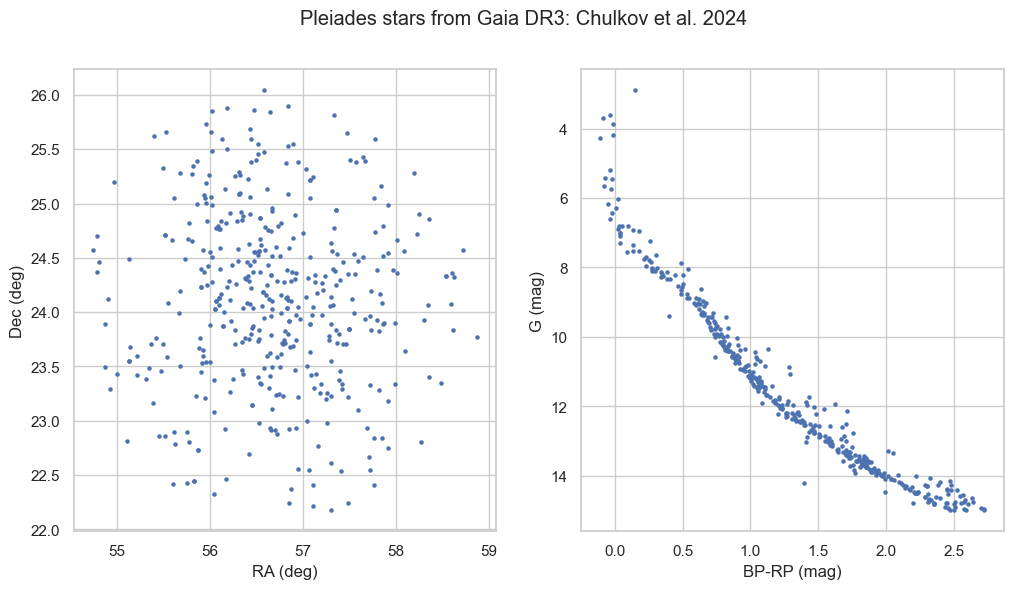

In [9]:
## Check plot:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Pleiades stars from Gaia DR3: Chulkov et al. 2024")
ax[0].scatter(df["ra"], df["dec"], s=5)
ax[0].set_xlabel("RA (deg)")
ax[0].set_ylabel("Dec (deg)")

ax[1].scatter(df["bp_rp"], df["phot_g_mean_mag"], s=5)
ax[1].set_ylabel("G (mag)")
ax[1].set_xlabel("BP-RP (mag)")
ax[1].invert_yaxis()

### First basic approach